# More (about some) Libraries 
<span style='color:#5A5A5A'> March <mark style="background-color: #FFFF00">4</mark>, 2021 </span>

Last time we covered how to read and write files in general, how to deal with CSV files in particular, Pandas data frames, and how to handle runtime errors that can for example be caused by user inputs or file operations.

Today we have a closer look at some of the most popular Python libraries for data science applications: Pandas (continued), NumPy and Matplotlib. They all belong to the SciPy collection of libraries for mathematics, science and engineering (https://www.scipy.org/). Always keep in mind that in the lecture we can only discuss a few selected examples, so refer to the respective online documentation for full reference.

On <mark style="background-color: #FFFF00">Friday (March 6)</mark> is the mid-term exam, covering the content of modules 1-8. Next week the lectures will continue, first with a unit on Git.


<h3 style='color:#3981CB'> Pandas </h3> 

The most important things to know about Pandas we have already covered last time: how to use Pandas to read content from CSV files, the data frame and series data structures, indexing operations and basic plotting and statistics methods for data frames and series. Please refer to the Pandas documentation at http://pandas.pydata.org/pandas-docs/stable/ for further details, as we cannot cover the library in depth in this course. In this lecture we only address two more aspects: handling of missing data and concatenating/joining tables with Pandas.

<h3 style='color:#3981CB'> Handling Missing Data </h3>

For various reasons it can happen that data are missing in a data frame. They might, for example, already have been missing in the input CSV file due to measurement faults, or have become unavailable because of computations that were not able to return a (good) result.
In Pandas the value ```np.nan``` (technically of type ```float```) is the primarily used value for representing missing data.  This can look as follows:


In [ ]:
import pandas as pd

df = pd.read_csv("table-with-missing-data.csv", sep=",")
print(df)

Note that the value ```None```, should it occur during computations, is usually also interpreted as ```NaN```, and generally the values to be interpreted as missing can be configured in the Python options. This should be done with care, however.  

By default, Pandas operations simply ignore ```NaN``` values. That is, they simply carry out the computation on the available data in the data frame or series, and/or propagate ```NaN``` values if a meaningful result cannot be derived. For example:


In [ ]:
print(df.describe())
print(df["age"]+1)

If such behavior is not wanted, the data frame or series can be manipulated accordingly before applying the operations. One option is to remove rows or columns with missing data completely by using the ```dropna()``` function. The following example shows how to drop all rows where any data are missing, and how to drop all rows where age or height data are missing:

In [ ]:
print(df.dropna())
print(df.dropna(subset=["age", "height"]))

Another possibility is to replace the ```NaN``` values by other/better values:

In [ ]:
print(df.fillna(0))
print(df.fillna(value={"age":0, "height":0}))
print(df.fillna(value={"age":df["age"].mean(), \
                       "height":df["height"].mean()}))

In some cases also Pandas’ ```interpolate()``` function can be used to come up with values to fill in for missing data. Of course, replacing missing data with values should always be done with great care, as there is a risk of producing distorted or even wrong results when adding data to a data set. Generally, the choice how to handle missing data depends on the specifics of the concrete case, but it is good to know about the different options.

<h3 style='color:#3981CB'> Concatenating and Joining Tables </h3>

When working with data frames, often the question arises how to combine two or more of them into one. The following illustrates the most important ways to do that.

The easiest case of combining two data frames into one is **concatenation**. It is possible if the two tables have the same columns, but a different set of rows, or if they have the same rows, but different sets of columns. In the former case, they can simply be concatenated vertically, on top of each other, and in the other case horizontally, or next to each other.  The following example illustrates how to do that with pandas, simply creating parts of the data frame above that are then concatenated:


In [ ]:
import pandas as pd

df = pd.read_csv("table-with-missing-data.csv", sep=",")

three_more_rows = pd.DataFrame(data=\
    {"name":["Ines","Joe","Kathy"],"age":[51,18,34],\
    "height":[178,185,168]})
print(three_more_rows)

df_concatenated = pd.concat([df, three_more_rows], axis=0)
print(df_concatenated)

Note that the ```concat()``` method does not assign new index values by default. Setting the parameter ```ignore_index=True``` will cause it to re-index, too.

Adding a new column to the data frame can be done with the same method, but using the other axis. For example:

In [ ]:
one_more_column = pd.Series([62,70,74,91,65,80,45,95],name="weight")
df_concatenated = pd.concat([df,one_more_column], axis=1)
print(df_concatenated)

Another, and sometimes not-so-easy case is the **joining** of data from different tables that do not come with the same set of rows or columns. In this case, one or more join keys need to be identified that are present in both files and can thus be used to associate the different data items to each other. Sometimes two columns are named the same and do in fact contain the same kind of data. Then it is easy to see that they might be a good key. Here is an example with two simple data frames that both have a key column and can thus easily be joined with merge:

In [ ]:
left = pd.DataFrame({'key': ['key1', 'key2', 'key3', 'key4'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})  

right = pd.DataFrame({'key': ['key1', 'key3', 'key4', 'key2'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

join = pd.merge(left, right, on='key')
print(join)

In other cases, it is not so obvious from the name of the column, but if there are two columns with different names that contain the same kind of data, they can also be used as join keys:

In [ ]:
left = pd.DataFrame({'key': ['key1', 'key2', 'key3', 'key4'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})  

right = pd.DataFrame({'ID': ['key5', 'key3', 'key4', 'key2'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

join = pd.merge(left, right, left_on="key",right_on="ID")
print(join)

Apparently, only the rows whose keys appear in both data frames are contained in the result. This is the default behavior and corresponds to a so-called inner join. It is also possible to use all data from one or both tables in the joined table, and let the missing values in the rows simply be filled with ```NaN``` values. Those are then called left outer join (if everything from the left table is used, but only the matching keys from the right), right outer join (everything from the right), or outer join (every-thing from both). See the following examples for illustration:

In [ ]:
inner_join = pd.merge(left, right, left_on="key", right_on="ID", how='inner')
print(inner_join)

left_outer_join = pd.merge(left, right, left_on="key", right_on="ID", how='left')
print(left_outer_join)

right_outer_join = pd.merge(left, right, left_on="key",right_on="ID", how='right')
print(right_outer_join)

outer_join = pd.merge(left, right, left_on="key",right_on="ID", how='outer')
print(outer_join)


For full reference regarding table merging operations with pandas, see https://pandas.pydata.org/pandas-docs/stable/merging.html.

<h3 style='color:#3981CB'> NumPy </h3>

The NumPy library (http://www.numpy.org/) has been designed to provide specific support for numerical mathematics in Python. In particular, it provides a data structure for n-dimensional arrays/matrices (the ndarray) and operations for working with it. Note that Pandas, itself focusing on functionality for data science applications, has been built on top of NumPy.

Here is a small basic NumPy example that shows some of many different ways to create ndarrays:

In [ ]:
import numpy as np
a = np.array([[1,5,6],[6,7,6],[5,4,3]])
b = np.zeros((3,3))
c = np.ones((3,3))
d = np.identity(3)
print(a)
print(b)
print(c)
print(d)

Indexing etc. basically works as with lists, data frames and other collection data structures that we have seen before. Note, however, that ndarrays are homogeneously typed, that is, all contained elements must be of the same type, and that they are usually fixed-size, that is, all rows in a dimension must be of the same length. Also appending new rows or columns to ndarrays is not as easy as with the aforementioned data types, so ideally they are created directly with the size and number of dimensions needed, and values filled in later in the program if needed. The advantage of ndarrays is that numerical operations on large matrices run much faster on them then on the dynamic collection data structures.

Python’s standard arithmetic operations can be used on ndarrays, and will be executed elementwise. For example:


In [ ]:
print(a+c)
print(a*a)
print((a-c)<=b)

For matrix-specific operations, own operators and attributes have been defined, for example for matrix multiplication and transposition:

In [ ]:
print(a@a) 
print(a.T)

Here is now an example (largely taken from https://www.geeksforgeeks.org/check-given-matrix-is-magic-square-or-not/) that actually does something more useful with ndarrays: A “magic square” is a nxn matrix all of whose row sums, column sums and the sums of the two diagonals are the same. The function ```is_magic(matrix)``` in the program below checks if a ndarray represents a magic square:

In [ ]:
import numpy as np

def is_magic(matrix):
    # check if matrix is nxn
    dim = matrix.shape
    if len(dim)!=2 or dim[0] != dim[1]: return False
    N = dim[0]        
    
    # calculate the sum of the prime diagonal 
    s = 0
    for i in range(0, N): 
        s = s + matrix[i][i]      
        
    # calculate the sum of the other diagonal
    s2 = 0
    for i in range(0,N):
        s2 = s2 + matrix[i][N-i-1]
        
    if (s != s2): return False
    
    # For sums of Rows
    for i in range(0, N):
        rowSum = 0;      
        for j in range(0, N): 
            rowSum += matrix[i][j]   
            
        # check if every row sum is equal to prime diagonal sum 
        if (rowSum != s): 
            return False
        
    # For sums of Columns 
    for i in range(0, N): 
        colSum = 0
        for j in range(0, N): 
            colSum += matrix[j][i]   
            
        # check if every column sum is equal to prime diagonal sum
        if (s != colSum):
            return False
        
    # if all yes, return true
    return True

# test program:
A = np.array([[4,9,2],
             [3,5,7],
             [8,1,6]])
B = np.array([[3,9,2],
              [4,5,7],
              [8,1,6]])

print(f"Is A magic? {is_magic(A)}")
print(f"Is B magic? {is_magic(B)}")


<h3 style='color:#3981CB'> Matplotlib </h3>

Matplotlib (https://matplotlib.org/) is Python's 2D plotting library. A number of plotting functions in other libraries, for example the Pandas plotting functions, are actually wrappers around the respective Matplotlib functions. Here is a first simple example with random data:


In [ ]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10]
y = [34,53,64,10,60,40,73,23,49,10]

plt.plot(x,y)
plt.show()

First the ```matplotlib.pyplot``` module (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) is imported and given the shorter name ```plt```. Then two lists x and y of same length are created. X contains a sequence of ascending numbers, and y the same number of random values. The simplest plot is to plot x against y, which is done with the ```plt.plot(x,y)``` statement. ```plt.show()``` then shows the plot.

Instead of or in addition to displaying the plots to the user, they can also be saved into raster or vector files for later use with the ```savefig``` function. See the following code for an example that also uses further parameters of the plot function to change the color and add markers to the plotted line:


In [ ]:
plt.plot(x,y, color="r", marker="o")
plt.savefig("plot.png")
plt.savefig("plot.pdf")

<mark style="background-color: #FFFF00">Resulting Files:</mark>

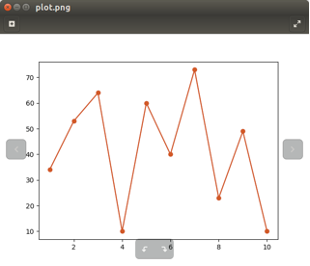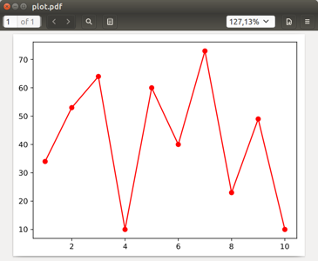

As another example, consider again the Dutch municipalities data set that we worked with earlier. We can create histograms of population numbers with the following code:

In [ ]:
df = pd.read_csv("dutch_municipalities.csv", sep="\t")
plt.hist(df["population"])
plt.show()

plt.hist(df["population"], bins=50)
plt.title("Size of Municipalities")
plt.xlabel("inhabitants")
plt.ylabel("# municipalities")
plt.show() 

In principle the functions in Matplotlib all work according to the same principles, but it is always crucial to refer to their specific documentation and understand their parameters in order to use them proficiently in own context. If you would like to see more examples, you can for example go to https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py for further introductory examples of 2D plotting,  https://pythonprogramming.net/matplotlib-intro-tutorial/ for video lectures on Matplotlib, or https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html for visualization using the Pandas package.
